# Sales order data exploration
Use this notebook to explore sales order data


In [24]:
df = spark.sql("SELECT * FROM datawaps.salesorders LIMIT 1000")
display(df)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 26, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 960e7b59-52ee-4ae8-9626-4651e63a37a3)

In [8]:
df = spark.read.format("csv").option("header","false").load("Files/orders/2019.csv")
# df now is a Spark DataFrame containing CSV data from "Files/orders/2019.csv".
display(df)


StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 61c9a646-f7b6-4b56-a911-25e4451e7c5f)

In [9]:
from pyspark.sql.types import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/2019.csv")

display(df)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f0f2ad73-dd6d-48e2-9649-7a547a169281)

In [10]:
from pyspark.sql.types import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/*.csv")

display(df)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 475e65bf-ce9b-4517-aab2-51ef594044fb)

In [11]:
customers = df['CustomerName', 'Email']

print(customers.count())
print(customers.distinct().count())

display(customers.distinct())

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 13, Finished, Available, Finished)

32718
12427


SynapseWidget(Synapse.DataFrame, 7abb6122-16b8-4568-bb09-66ed04551a65)

In [14]:
customers = df.select("CustomerName", "Email")
display(customers)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 16, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 2330ddbe-81c6-4e21-ad58-f755fe2d7305)

In [15]:
customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())

display(customers.distinct())

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 17, Finished, Available, Finished)

133
133


SynapseWidget(Synapse.DataFrame, 8824db39-2bf9-49e5-a87d-0b4585e45f6b)

In [16]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()

display(productSales)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5215e202-b0c1-4aa5-a429-9c09d8f52972)

In [17]:
from pyspark.sql.functions import *

yearlySales = df.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")

display(yearlySales)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c7f43d00-6ce0-46b8-9f1b-7db2c351daf6)

In [18]:
from pyspark.sql.functions import *

# Create Year and Month columns
transformed_df = df.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate")))

# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 20, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 42b82017-349a-49dc-b90c-26ef663250b1)

In [19]:
transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')

print ("Transformed data saved!")

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 21, Finished, Available, Finished)

Transformed data saved!


In [20]:
orders_df = spark.read.format("parquet").load("Files/transformed_data/orders")
display(orders_df)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 22, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 490cdaf5-50c7-4d16-b7a9-e37bd5a94f3e)

In [21]:
orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")

print ("Transformed data saved!")

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 23, Finished, Available, Finished)

Transformed data saved!


In [22]:
orders_2021_df = spark.read.format("parquet").load("Files/partitioned_data/Year=2021/Month=*")

display(orders_2021_df)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 24, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 1edfef90-e7be-4c9c-ab7c-cf1ba21a9b06)

In [23]:
# Create a new table
df.write.format("delta").saveAsTable("salesorders")

# Get the table description
spark.sql("DESCRIBE EXTENDED salesorders").show(truncate=False)

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 25, Finished, Available, Finished)

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                            |comment|
+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|SalesOrderNumber            |string                                                                                                                               |NULL   |
|SalesOrderLineNumber        |int                                                                                                                                  |NULL   |
|OrderDate                   |date                                                                                                     

In [26]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 28, Finished, Available, Finished)

<Spark SQL result set with 3 rows and 2 fields>

In [27]:
%%sql
SELECT * FROM salesorders

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 29, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 9 fields>

In [28]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue, \
                COUNT(DISTINCT SalesOrderNumber) AS YearlyCounts \
            FROM salesorders \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 30, Finished, Available, Finished)

+---------+--------------------+------------+
|OrderYear|        GrossRevenue|YearlyCounts|
+---------+--------------------+------------+
|     2019|   4172169.969970703|        1201|
|     2020|   6882259.268127441|        2733|
|     2021|1.1547835291696548E7|       12525|
+---------+--------------------+------------+



StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 31, Finished, Available, Finished)

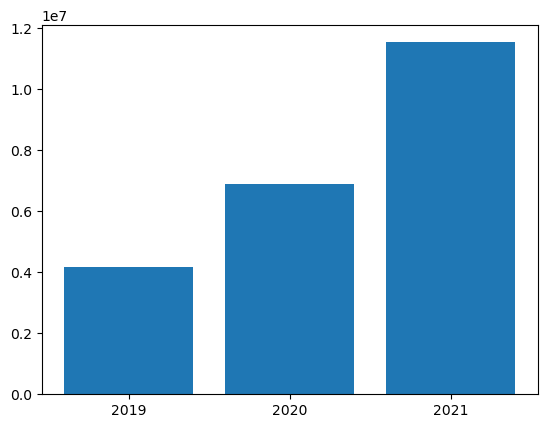

In [29]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 32, Finished, Available, Finished)

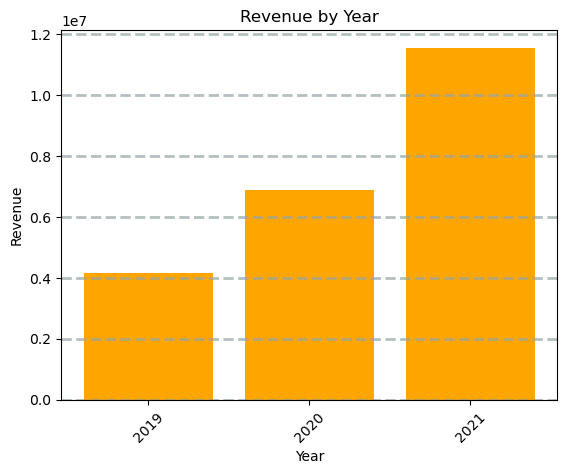

In [30]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 33, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

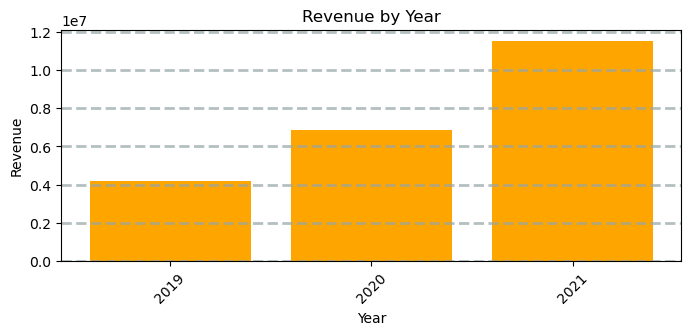

In [31]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 34, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

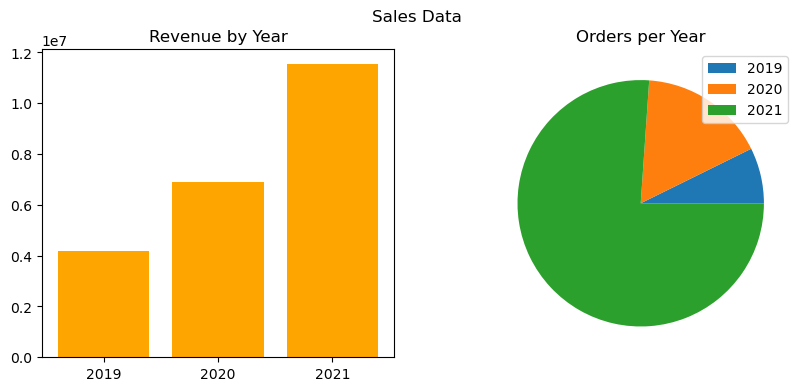

In [32]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

# Create a pie chart of yearly order counts on the second axis
ax[1].pie(df_sales['YearlyCounts'])
ax[1].set_title('Orders per Year')
ax[1].legend(df_sales['OrderYear'])

# Add a title to the Figure
fig.suptitle('Sales Data')

# Show the figure
plt.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 35, Finished, Available, Finished)

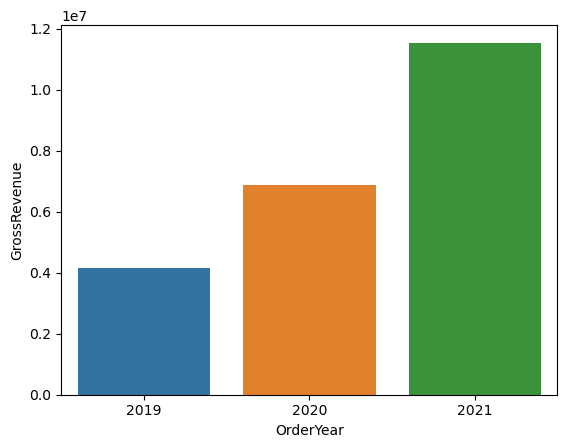

In [33]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 36, Finished, Available, Finished)

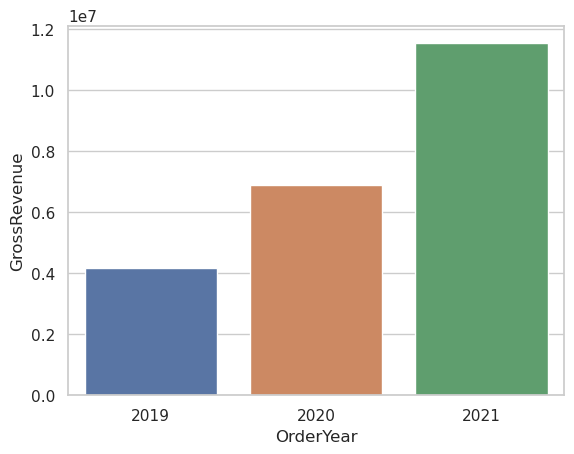

In [34]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()

StatementMeta(, 0e1e92bd-546d-4bf8-8d35-4c8e857f313a, 37, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


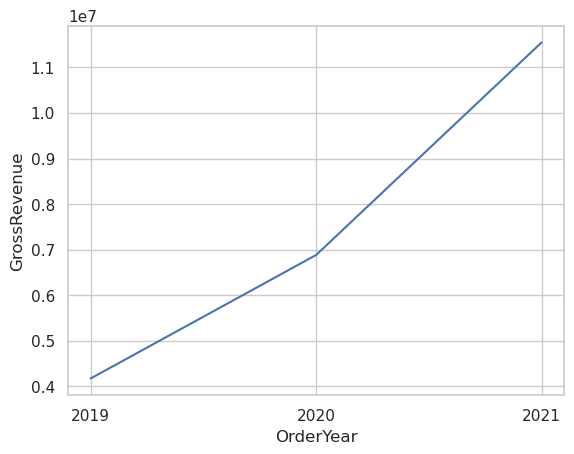

In [35]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a line chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()